In [183]:
import pandas as pd
import numpy as np

In [184]:
df=pd.read_csv("user_reviews_g2.csv",dtype={'id':str,
                                            'review':str,
                                            'type_review':str,
                                            'language':str,
                                            'date':str,
                                            'views':int,
                                            'votes':int,
                                            'score':int})
df.head()

,id,review,type_review,date,language,views,votes,score
0,Maksim_ON,"Продовження культової серії, було зіпсоване че...",expanded,2021-03-17,Ukrainian,2,2,2
1,Araset,"Well, it's most definetly sheeet and peess and...",expanded,2021-03-16,English,2,2,1
2,realistyalanci,"Pathetic.,Disappointment. Inconsistency.,Cring...",expanded,2021-03-16,English,3,3,0
3,Cliente,A maior traição que eu já vi na minha vida do ...,normal,2021-03-15,Portuguese,3,3,0
4,wingZero21,I really enjoyed the first game. It was a 10/1...,normal,2021-03-14,English,2,2,6


In [185]:
df_eng = df.loc[(df["language"]=='English')]
df_eng.count()

id             24209
review         24209
type_review    24209
date           24209
language       24209
views          24209
votes          24209
score          24209
dtype: int64

In [186]:
print(df_eng.iloc[10]["review"])
print(df_eng.iloc[10]["score"])

Simply the best game of the generation and one of the best games ever made that's all
10


In [187]:
# Get just reviews and score
reviews_df=df_eng[['review','score']]
reviews_df.head()

,review,score
1,"Well, it's most definetly sheeet and peess and...",1
2,"Pathetic.,Disappointment. Inconsistency.,Cring...",0
4,I really enjoyed the first game. It was a 10/1...,6
5,This game is a very sad destruction of an amaz...,0
7,"It’s a different game from part one, not bad o...",2


In [188]:
reviews_df["score"].value_counts(bins=3)

(-0.011, 3.333]    11922
(6.667, 10.0]      10608
(3.333, 6.667]      1679
Name: score, dtype: int64

In [189]:
def score_change(score):
    if score <= 3:
        return 'NEGATIVE'
    elif 4<=score<=6:
        return 'NEUTRAL'
    else:
        return 'POSITIVE'

reviews_df["Score"] = reviews_df['score'].apply(lambda x:score_change(x))
reviews_df.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,review,score,Score
1,"Well, it's most definetly sheeet and peess and...",1,NEGATIVE
2,"Pathetic.,Disappointment. Inconsistency.,Cring...",0,NEGATIVE
4,I really enjoyed the first game. It was a 10/1...,6,NEUTRAL
5,This game is a very sad destruction of an amaz...,0,NEGATIVE
7,"It’s a different game from part one, not bad o...",2,NEGATIVE


In [190]:
reviews_df['review_len'] = reviews_df['review'].apply(lambda x: len(x) - x.count(" "))

reviews_df.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,review,score,Score,review_len
1,"Well, it's most definetly sheeet and peess and...",1,NEGATIVE,64
2,"Pathetic.,Disappointment. Inconsistency.,Cring...",0,NEGATIVE,104
4,I really enjoyed the first game. It was a 10/1...,6,NEUTRAL,2049
5,This game is a very sad destruction of an amaz...,0,NEGATIVE,341
7,"It’s a different game from part one, not bad o...",2,NEGATIVE,92


In [191]:
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

reviews_df['punct%'] = reviews_df['review'].apply(lambda x: count_punct(x))

reviews_df.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,review,score,Score,review_len,punct%
1,"Well, it's most definetly sheeet and peess and...",1,NEGATIVE,64,4.7
2,"Pathetic.,Disappointment. Inconsistency.,Cring...",0,NEGATIVE,104,9.6
4,I really enjoyed the first game. It was a 10/1...,6,NEUTRAL,2049,2.8
5,This game is a very sad destruction of an amaz...,0,NEGATIVE,341,1.5
7,"It’s a different game from part one, not bad o...",2,NEGATIVE,92,1.1


In [192]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

In [193]:
print(reviews_df['review_len'].max())
print(reviews_df['punct%'].max())

4164
91.3


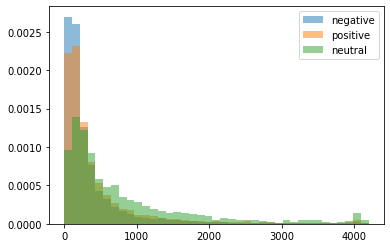

In [194]:
bins = np.linspace(0, 4200, 40)

pyplot.hist(reviews_df[reviews_df['Score']=='NEGATIVE']['review_len'], bins, alpha=0.5, density=True, label='negative')
pyplot.hist(reviews_df[reviews_df['Score']=='POSITIVE']['review_len'], bins, alpha=0.5, density=True, label='positive')
pyplot.hist(reviews_df[reviews_df['Score']=='NEUTRAL']['review_len'], bins, alpha=0.5, density=True, label='neutral')
pyplot.legend(loc='upper right')
pyplot.show()

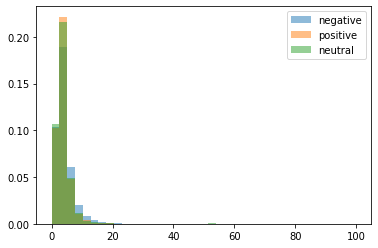

In [195]:
bins = np.linspace(0, 100, 40)

pyplot.hist(reviews_df[reviews_df['Score']=='NEGATIVE']['punct%'], bins, alpha=0.5, density=True, label='negative')
pyplot.hist(reviews_df[reviews_df['Score']=='POSITIVE']['punct%'], bins, alpha=0.5, density=True, label='positive')
pyplot.hist(reviews_df[reviews_df['Score']=='NEUTRAL']['punct%'], bins, alpha=0.5, density=True, label='neutral')
pyplot.legend(loc='upper right')
pyplot.show()

# Remove punctuation and stopwords

In [196]:
import string
import re
import nltk
def clean_data(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    tokens = re.split('\W+', text_nopunct)
    text = [word for word in tokens if word not in stopword]
    #text2 = [wn.lemmatize(word) for word in text]
    return text

In [141]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer=clean_data)
x_vectors = vectorizer.fit_transform(reviews_df['review'])
x_vectors.shape

(24209, 57253)

In [151]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x_vectors,reviews_df.Score,test_size=0.2,stratify=reviews_df.Score,random_state=42)

In [197]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(reviews_df.review,reviews_df.Score,test_size=0.2,stratify=reviews_df.Score,random_state=42)

In [199]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_data)
tfidf_vect_fit = tfidf_vect.fit(train_x)

tfidf_train = tfidf_vect_fit.transform(train_x)
tfidf_test = tfidf_vect_fit.transform(test_x)

# Classification

In [152]:
#SVM

In [200]:
from sklearn import svm

clf_svm = svm.SVC(kernel='rbf')

In [201]:
clf_svm.fit(tfidf_train, train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [202]:
from sklearn.metrics import accuracy_score

predictions_svm = clf_svm.predict(tfidf_test)
accuracy_score(test_y, predictions_svm)

0.859149111937216

In [203]:
from sklearn.metrics import classification_report
print(classification_report(test_y, predictions_svm, target_names=['negative','neutral','positive']))

              precision    recall  f1-score   support

    negative       0.83      0.94      0.88      2384
     neutral       0.88      0.02      0.04       336
    positive       0.90      0.91      0.90      2122

    accuracy                           0.86      4842
   macro avg       0.87      0.62      0.61      4842
weighted avg       0.86      0.86      0.83      4842



In [204]:
test_set = ['the game was alright, very average in my opinion',"i didn't like the story very much at all, it was weak and a had a shadow of depth compared to the original",'lots of fun, had a great time']
x_examples = tfidf_vect.transform(test_set)

In [205]:
clf_svm.predict(x_examples)

array(['POSITIVE', 'NEGATIVE', 'POSITIVE'], dtype=object)

In [209]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=150,n_jobs=-1)
rf_model = rf.fit(tfidf_train, train_y)

In [210]:
predictions_rf = rf_model.predict(tfidf_test)
accuracy_score(test_y, predictions_rf)

0.8314745972738538